In [1]:
import numpy as np

from matplotlib import pyplot as plt 
from matplotlib import colors as mclr
from matplotlib import colormaps as cmaps

import time

In [183]:
def correlator_PBC(f,g):
    """Accepts arrays f,g [Nx,Nky,Nw] and returns the circular autocorrelation with automatically zero-padded last axis.
    Precisely this retuns z[i,j,k] = sum_{l,m,n} x[l,m,n] * y[i+l,j+m,k+n] padded appropriately on last axis.
    Finally, this shifts the frequencies to the center again at the end. 
    """
    pad_size = f.shape[-1]
    
    f_padded = np.pad(f,( (0,0),(0,0),(pad_size,pad_size) ) ) 
    g_padded = np.pad(g,( (0,0),(0,0),(pad_size,pad_size) ) )  

    ### Now we take the FFT of both arrays 
    f_fft = np.fft.fftn(f_padded)
    g_fft = np.fft.fftn(g_padded)
    
    ### Next we take an element-wise product 
    ### conjugate to compute correlation instead of convolution
    h_fft = f_fft*np.conjugate(g_fft) 

    ### Now we transform back
    h_padded = np.fft.ifftn(h_fft)

    h = np.roll(h_padded,[0,0,pad_size//2],[0,1,2])[:,:,:pad_size]

    ### We now have to chop off the padded zeros
    #z = np.fft.ifftshift(z_padded,axes=-1) ### Shift to middle of spectrum
    #z = z[...,pad_size:2*pad_size] ### Chop out the padded parts
    #z = np.fft.fftshift(z,axes=-1) ### Shift back to 
    
    return np.real(h)

In [189]:
Nx = 10
Ny = 10
Nz = 250
x = np.linspace(0.,2.*np.pi,Nx)
y = np.linspace(0.,2.*np.pi,Ny)
z = np.linspace(-5.,5.,Nz)

dz = z[1]-z[0]

In [190]:
xs,ys,zs = np.meshgrid(x,y,z)

In [191]:
def A1g(x,y):
    return 0.5*np.cos(x) +0.5*np.cos(y)

In [192]:
a1g = A1g(xs,ys)
box = np.ones_like(a1g)

box[:,:,z<-1.] = 0.
box[:,:,z>1.] = 0.

f = a1g 

g = f.copy()

h = correlator_PBC(f,g)*dz/float(Nx*Ny)

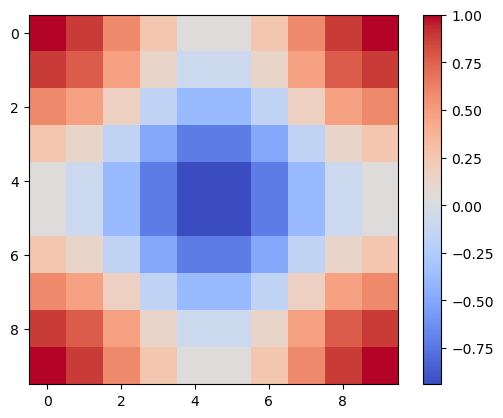

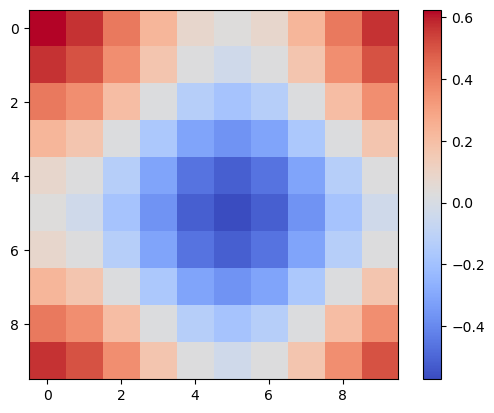

In [194]:
plt.imshow(f[...,14],cmap='coolwarm')
plt.colorbar()
plt.show()
plt.imshow(h[...,14]/(.25*10.),cmap='coolwarm')
plt.colorbar()
plt.show()
